In [68]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.statista.com/statistics/316750/inflation-rate-in-argentina/')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="table hidden" id="statTableHTML"><thead><tr><th>Characteristic</th><th>Inflation rate compared to previous year</th></tr></thead><tbody><tr><td>2020</td><td>42.02<span>%</span></td></tr><tr><td>2019</td><td>53.55<span>%</span></td></tr><tr><td>2018</td><td>34.28<span>%</span></td></tr><tr><td>2017</td><td>25.68<span>%</span></td></tr><tr><td>2016</td><td>-</td></tr><tr><td>2015</td><td>-</td></tr><tr><td>2014</td><td>-</td></tr><tr><td>2013</td><td>10.62<span>%</span></td></tr><tr><td>2012</td><td>10.04<span>%</span></td></tr><tr><td>2011</td><td>9.78<span>%</span></td></tr><tr><td>2010</td><td>10.46<span>%</span></td></tr><tr><td>2009</td><td>6.27<span>%</span></td></tr><tr><td>2008</td><td>8.59<span>%</span></td></tr><tr><td>2007</td><td>8.83<span>%</span></td></tr><tr><td>2006</td><td>10.9<span>%</span></td></tr><tr><td>2005</td><td>9.64<span>%</span></td></tr><tr><td>2004</td><td>4.42<span>%</span></td></tr></tbody></table>


In [69]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    s=s.replace('%','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])


[['Characteristic', 'Inflation rate compared to previous year'], ['2020', '42.02'], ['2019', '53.55'], ['2018', '34.28'], ['2017', '25.68'], ['2016', '-'], ['2015', '-'], ['2014', '-'], ['2013', '10.62'], ['2012', '10.04'], ['2011', '9.78'], ['2010', '10.46'], ['2009', '6.27'], ['2008', '8.59'], ['2007', '8.83'], ['2006', '10.9'], ['2005', '9.64'], ['2004', '4.42']]


In [70]:
';'.join(table[0])

'Characteristic;Inflation rate compared to previous year'

In [71]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('inflasjon.csv',table)

In [72]:
import pandas as pd
Inflasjon = pd.read_csv('inflasjon.csv', delimiter=';', encoding='latin1')
Inflasjon

,Characteristic,Inflation rate compared to previous year
0,2020,42.02
1,2019,53.55
2,2018,34.28
3,2017,25.68
4,2016,-
5,2015,-
6,2014,-
7,2013,10.62
8,2012,10.04
9,2011,9.78


In [73]:
Inflasjon.drop([4,5,6], axis=0, inplace=True)
Inflasjon

,Characteristic,Inflation rate compared to previous year
0,2020,42.02
1,2019,53.55
2,2018,34.28
3,2017,25.68
7,2013,10.62
8,2012,10.04
9,2011,9.78
10,2010,10.46
11,2009,6.27
12,2008,8.59


In [74]:
Inflasjon['Inflation rate compared to previous year'] = Inflasjon['Inflation rate compared to previous year'].astype(float, errors = 'raise')
Inflasjon['Characteristic'] = Inflasjon['Characteristic'].astype(float, errors = 'raise')

(2003.0, 2021.0, 0.0, 60.0)

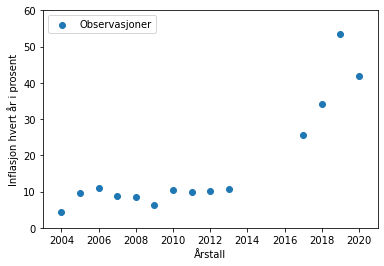

In [75]:
import numpy as np
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Inflasjon hvert år i prosent')
ax.set_xlabel('Årstall')

#plotting the function:
ax.scatter(Inflasjon['Characteristic'], Inflasjon['Inflation rate compared to previous year'],  label='Observasjoner')
ax.legend(loc='upper left')
plt.axis([2003, 2021, 0, 60])
#plt.ylim([0, 70])
#plt.yticks(np.arange(0, 70, 1))
#plt.xticks(np.arange(2004, 2020+1, 1))

In [76]:
y=Inflasjon['Inflation rate compared to previous year']
pd.DataFrame(y)

,Inflation rate compared to previous year
0,42.02
1,53.55
2,34.28
3,25.68
7,10.62
8,10.04
9,9.78
10,10.46
11,6.27
12,8.59


In [77]:
x=pd.DataFrame(np.log(Inflasjon['Characteristic']))
x['intercept']=1
x

,Characteristic,intercept
0,7.610853,1
1,7.610358,1
2,7.609862,1
3,7.609367,1
7,7.607381,1
8,7.606885,1
9,7.606387,1
10,7.605890,1
11,7.605392,1
12,7.604894,1


In [78]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                                       OLS Regression Results                                       
Dep. Variable:     Inflation rate compared to previous year   R-squared:                       0.746
Model:                                                  OLS   Adj. R-squared:                  0.724
Method:                                       Least Squares   F-statistic:                     35.18
Date:                                      Thu, 28 Apr 2022   Prob (F-statistic):           6.91e-05
Time:                                              23:39:01   Log-Likelihood:                -47.895
No. Observations:                                        14   AIC:                             99.79
Df Residuals:                                            12   BIC:                             101.1
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                

C:\Users\Jørgen\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [79]:
res.params

Characteristic     4941.567322
intercept        -37570.830896
dtype: float64

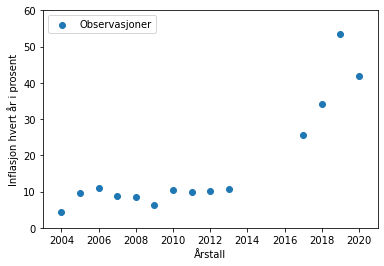

In [86]:
x=np.linspace(min(np.log(Inflasjon['Characteristic'])), max(np.log(Inflasjon['Characteristic'])), 100)

regression_line=res.params['intercept']+res.params['Characteristic']*x

ax.plot(x, regression_line,color='red')
fig

In [ ]:
# Problemer med å få plottet regressjonslinja. 
# Utifra tallene vi har kan vi se at Argentina har en ekstremt stigene inflasjon som ser ut til å fortsette. 